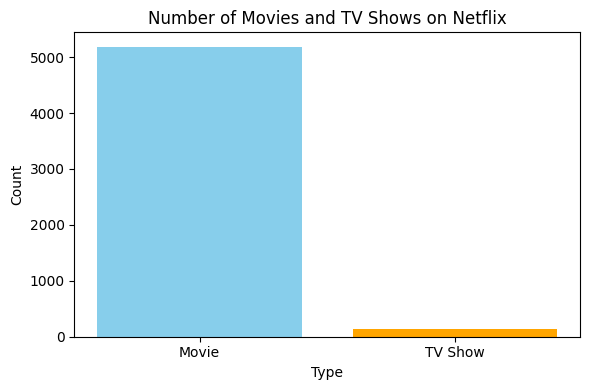

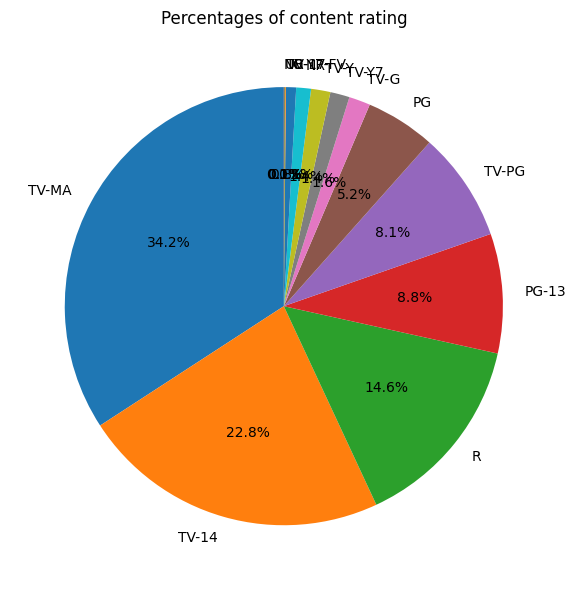

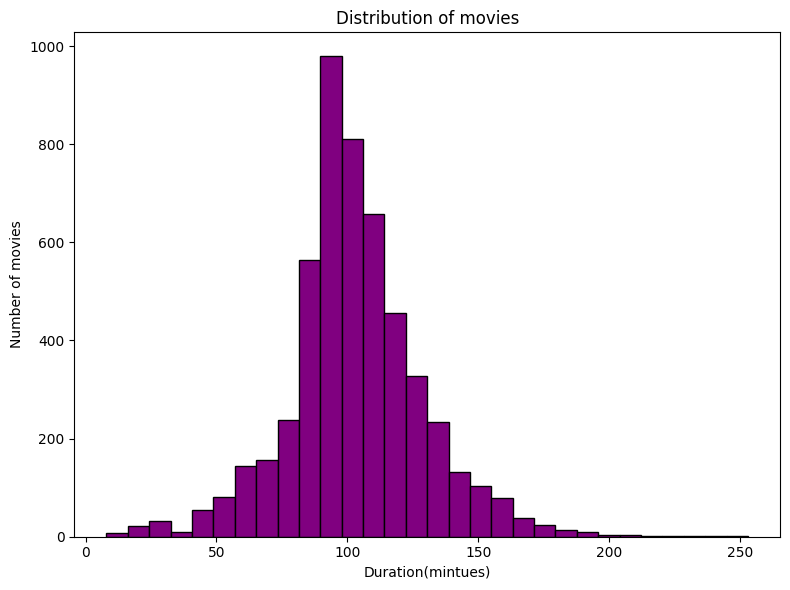

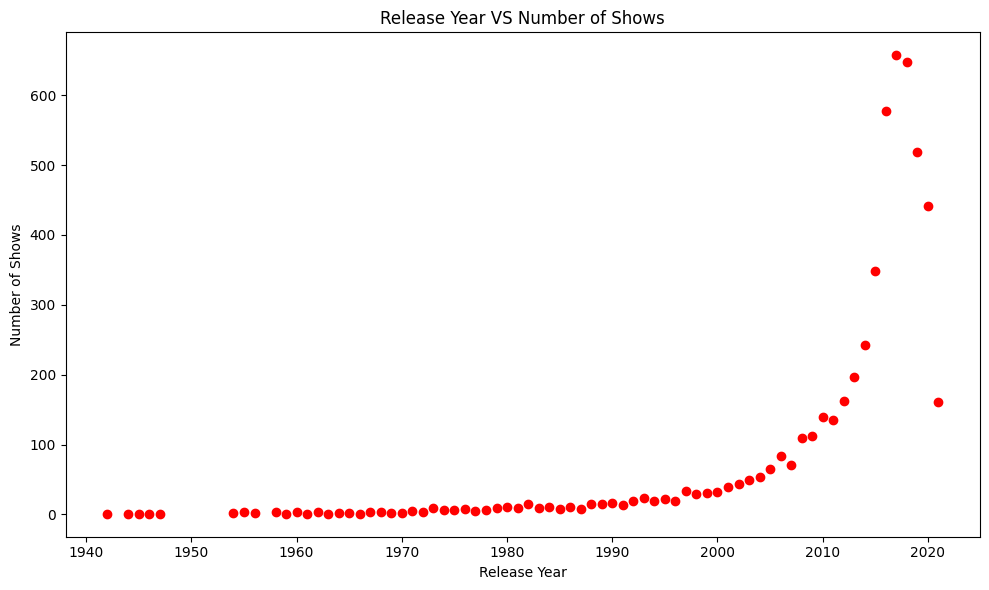

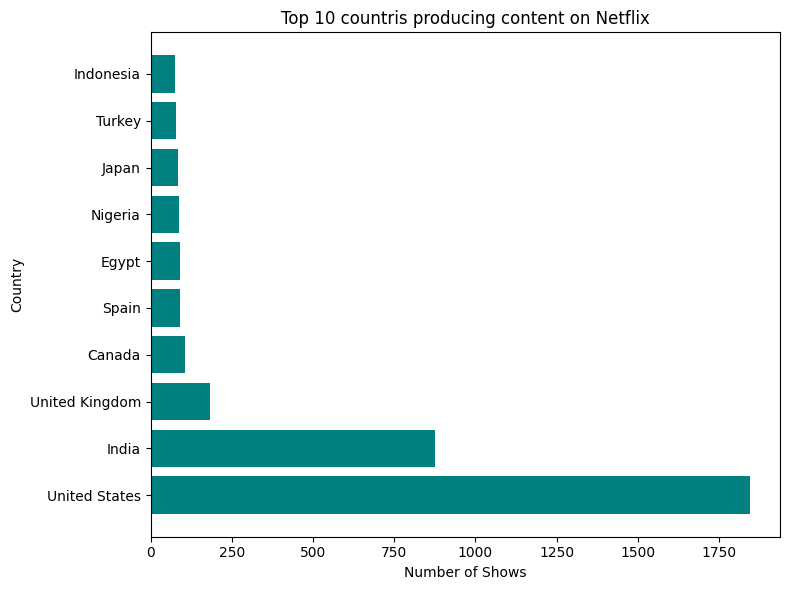

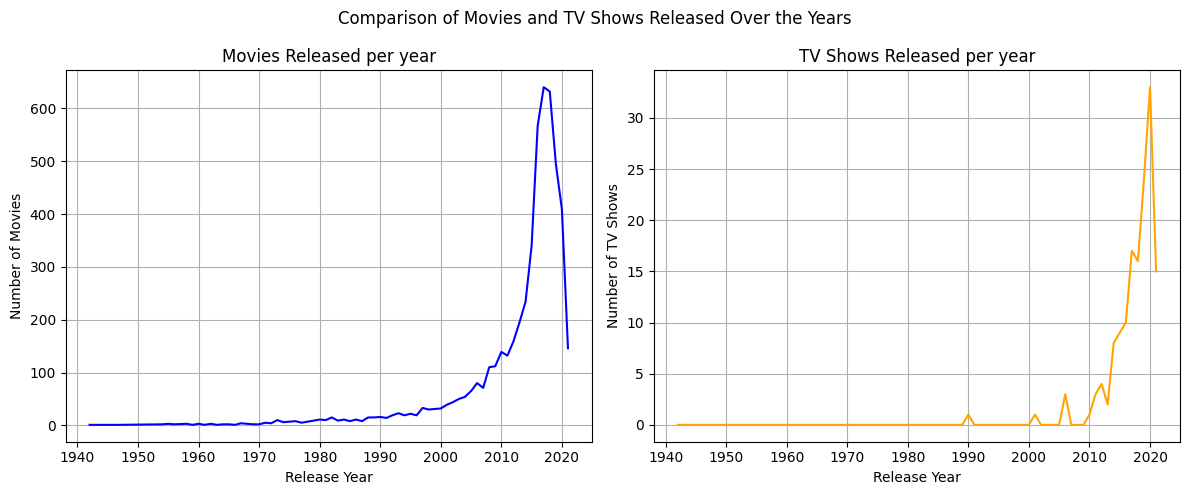

In [15]:
# S-1 import libraries
import pandas as pd 
import matplotlib.pyplot as plt

#  S-2 load the data
df = pd.read_csv('netflix_titles.csv')

# clean data
df =df.dropna(subset =['type','title','director','cast','country','date_added','release_year','rating','duration','listed_in','description'])

type_counts =df['type'].value_counts()
plt.figure(figsize =(6,4))
plt.bar(type_counts.index,type_counts.values,color =['skyblue','orange'])
plt.title('Number of Movies and TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()

rating_counts = df['rating'].value_counts()
plt.figure(figsize =(8,6))
plt.pie(rating_counts,labels =rating_counts.index,autopct ='%1.1f%%',startangle =90)
plt.title('Percentages of content rating')
plt.tight_layout()
plt.savefig('Content_rating.png')
plt.show()


movies_df =df[df['type']=='Movie'].copy()
movies_df['duration_int']= movies_df['duration'].str.replace(' min','').astype(int)

plt.figure(figsize =(8,6))
plt.hist(movies_df['duration_int'],bins =30,color ='purple',edgecolor ='black')
plt.title('Distribution of movies')
plt.xlabel('Duration(mintues)')
plt.ylabel('Number of movies')
plt.tight_layout()
plt.savefig('movies_duration_histogram.png')
plt.show()

release_counts =df['release_year'].value_counts().sort_index()
plt.figure(figsize =(10,6))
plt.scatter(release_counts.index,release_counts.values,color ='red')
plt.title('Release Year VS Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('release_year_scatter.png')
plt.show()

country_counts =df['country'].value_counts().head(10)
plt.figure(figsize =(8,6))
plt.barh(country_counts.index,country_counts.values,color='teal')
plt.title('Top 10 countris producing content on Netflix')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('Top10_Countries.png')
plt.show()

content_by_year =df.groupby(['release_year','type']).size().unstack().fillna(0)

fig,ax =plt.subplots(1,2,figsize =(12,5))

# first subplot of movies
ax[0].plot(content_by_year.index,content_by_year['Movie'],color='blue')
ax[0].set_title('Movies Released per year')
ax[0].set_xlabel('Release Year')
ax[0].set_ylabel('Number of Movies')
ax[0].grid(True)

# Second subplot of TV Shows
ax[1].plot(content_by_year.index,content_by_year['TV Show'],color='orange')
ax[1].set_title('TV Shows Released per year')
ax[1].set_xlabel('Release Year')
ax[1].set_ylabel('Number of TV Shows')
ax[1].grid(True)

plt.suptitle('Comparison of Movies and TV Shows Released Over the Years')

plt.tight_layout()
plt.savefig('movies_tvshows_comparison.png')
plt.show()